In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os

In [3]:
print(os.listdir('../data'))

['DJI_STO_20period_sma10.csv', 'N225.csv', 'DJI_modified_features - DJI.csv', 'N225fillVOL.csv', 'DJI_modified_sma.csv', 'downjone5y.csv', 'N225withoutNULL.csv', 'dowjone1985_2019.csv', '.ipynb_checkpoints', 'DJI_denoise.csv']


In [5]:
df = pd.read_csv('../data/dowjone1985_2019.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1985-01-29,1277.719971,1295.489990,1266.890015,1292.619995,1292.619995,13560000
1,1985-01-30,1297.369995,1305.099976,1278.930054,1287.880005,1287.880005,16820000
2,1985-01-31,1283.239990,1293.400024,1272.640015,1286.770020,1286.770020,14070000
3,1985-02-01,1276.939941,1286.109985,1269.770020,1277.719971,1277.719971,10980000
4,1985-02-04,1272.079956,1294.939941,1268.989990,1290.079956,1290.079956,11630000


In [12]:
spans = [5, 10, 20, 30, 50, 100, 200]

for span in spans:
    ema_short = df['Close'].ewm(span=span, adjust=False).mean()
    df['ema_' + str(span)] = ema_short

In [13]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ema_5,ema_10,ema_20,ema_30,ema_50,ema_100,ema_200
0,1985-01-29,1277.719971,1295.489990,1266.890015,1292.619995,1292.619995,13560000,1292.619995,1292.619995,1292.619995,1292.619995,1292.619995,1292.619995,1292.619995
1,1985-01-30,1297.369995,1305.099976,1278.930054,1287.880005,1287.880005,16820000,1291.039998,1291.758179,1292.168567,1292.314189,1292.434113,1292.526134,1292.572831
2,1985-01-31,1283.239990,1293.400024,1272.640015,1286.770020,1286.770020,14070000,1289.616672,1290.851241,1291.654420,1291.956501,1292.211992,1292.412151,1292.515092
3,1985-02-01,1276.939941,1286.109985,1269.770020,1277.719971,1277.719971,10980000,1285.651105,1288.463737,1290.327330,1291.038015,1291.643677,1292.121217,1292.367876
4,1985-02-04,1272.079956,1294.939941,1268.989990,1290.079956,1290.079956,11630000,1287.127389,1288.757595,1290.303770,1290.976205,1291.582355,1292.080796,1292.345111


/usr/local/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


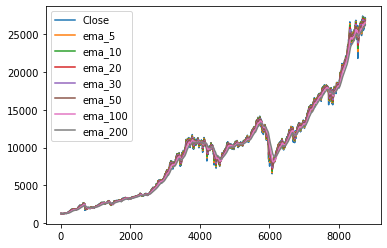

In [15]:
cols = ['Close']
for span in spans:
    cols.append('ema_' + str(span))
df.plot(y=cols, legend=True)

In [ ]:
df.to_csv('../data/s')